## Data Import and Matrix Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Fill in gender in R1 and R2 matrix

In [2]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_R1_R2_on_0702clean_data.csv')

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']
Y1['Gender'] = df['Gender']

In [4]:
df.head()

,Unnamed: 0,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,b8_combo,...,Section_f,Section_g,Section_h,Section_t,Section_ij_6mos,Section_ij_ever,ClientType,PR: Max Last Status,Dismissal Reason,RiskFactor
0,0,10358.0,3.0,5.0,4.0,5.0,4.0,3.0,3.0,2.0,...,1,0,4,1.0,2,8.0,Secondary Prevention,Graduated program successfully,NaN,8
1,3,10383.0,4.0,5.0,4.0,4.0,5.0,3.0,3.0,3.0,...,4,4,4,3.0,4,15.0,Secondary Prevention,Other (specify),NaN,9
2,6,10392.0,3.0,5.0,3.0,1.0,3.0,1.0,5.0,3.0,...,0,1,0,0.0,0,2.0,Secondary Prevention,Graduated program successfully,NaN,4
3,9,10393.0,2.0,3.0,4.0,2.0,3.0,2.0,4.0,3.0,...,1,2,4,3.0,1,10.0,Secondary Prevention,Graduated program successfully,NaN,9
4,12,10397.0,3.0,5.0,2.0,4.0,3.0,3.0,4.0,3.0,...,1,2,0,0.0,0,3.0,Secondary Prevention,Graduated program successfully,NaN,6


In [5]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']
R1['Gender'] = df['Gender']

In [6]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']
R2['Gender'] = df['Gender']

In [7]:
# change all nan gender values in R1 according to their values in Y1

for index in R1.index:
    if pd.isnull(R1.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R1.loc[index, 'Gender'] = gender

In [8]:
# change all nan gender values in R2 according to their values in Y1

for index in R2.index:
    if pd.isnull(R2.loc[index, 'Gender']):
        gender = Y1.loc[index,'Gender']
        R2.loc[index, 'Gender'] = gender

In [9]:
Gender_Incos = []
for index in Y1.index:
    if (Y1.loc[index, 'Gender'] != R1.loc[index, 'Gender']) or (R1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) or (Y1.loc[index, 'Gender'] != R2.loc[index, 'Gender']) :
        Gender_Incos.append(Y1.loc[index, 'UniqueID'])

### Drop IDs with Nan values

In [10]:
#indices
columns = Y1.columns.tolist()
columns = columns[:-1]

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [11]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[]

In [12]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[]

In [13]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[]

In [14]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[]

In [15]:
ID_list.extend(Gender_Incos)

In [16]:
ID_list

[11177.0,
 11195.0,
 11218.0,
 11394.0,
 11419.0,
 11752.0,
 12926.0,
 12952.0,
 13071.0,
 17040.0,
 17651.0,
 17851.0,
 17959.0,
 21493.0,
 22624.0,
 28767.0,
 29298.0,
 29415.0,
 29542.0,
 29704.0,
 31457.0,
 31947.0,
 32298.0,
 33616.0,
 34230.0,
 41607.0]

In [17]:
#drop these IDs from the data
for id in ID_list:
    Y1 = Y1[Y1['UniqueID']!=id]

In [18]:
Y1.head

<bound method NDFrame.head of       UniqueID  a1_combo  a2_combo  a3_combo  a4_combo  a5_combo  a6_combo  \
0      10358.0       3.0       5.0       4.0       5.0       4.0       3.0   
1      10383.0       4.0       5.0       4.0       4.0       5.0       3.0   
2      10392.0       3.0       5.0       3.0       1.0       3.0       1.0   
3      10393.0       2.0       3.0       4.0       2.0       3.0       2.0   
4      10397.0       3.0       5.0       2.0       4.0       3.0       3.0   
5      10405.0       2.0       3.0       3.0       2.0       2.0       2.0   
6      10418.0       3.0       5.0       3.0       2.0       3.0       2.0   
7      10437.0       4.0       5.0       5.0       4.0       4.0       1.0   
8      10441.0       4.0       3.0       3.0       2.0       4.0       1.0   
9      10442.0       4.0       4.0       2.0       1.0       4.0       1.0   
10     10524.0       4.0       4.0       4.0       4.0       5.0       2.0   
11     10530.0       2.0       4.0

In [19]:
#drop these IDs from the data
for id in ID_list:
    R1 = R1[R1['UniqueID']!=id]

In [20]:
#drop these IDs from the data
for id in ID_list:
    R2 = R2[R2['UniqueID']!=id]

## Split each matrix by Gender

In [21]:
Y1_M = Y1[Y1['Gender'] == 1]
Y1_F = Y1[Y1['Gender'] == 2]
Y1_M = Y1_M.drop('UniqueID', axis=1)
Y1_F = Y1_F.drop('UniqueID', axis=1)
Y1_M = Y1_M.drop('Gender', axis=1)
Y1_F = Y1_F.drop('Gender', axis=1)
Y1_M = Y1_M.transpose()
Y1_F = Y1_F.transpose()

In [22]:
Y1_M.shape

(39, 933)

In [23]:
Y1_F.shape

(39, 588)

In [24]:
R1_M = R1[R1['Gender'] == 1]
R1_F = R1[R1['Gender'] == 2]
R1_M = R1_M.drop('UniqueID', axis=1)
R1_F = R1_F.drop('UniqueID', axis=1)
R1_M = R1_M.drop('Gender', axis=1)
R1_F = R1_F.drop('Gender', axis=1)
R1_M = R1_M.transpose()
R1_F = R1_F.transpose()
R1_M.shape

(39, 933)

In [25]:
R1_F.shape

(39, 588)

In [26]:
R2_M = R2[R2['Gender'] == 1]
R2_F = R2[R2['Gender'] == 2]
R2_M = R2_M.drop('UniqueID', axis=1)
R2_F = R2_F.drop('UniqueID', axis=1)
R2_M = R2_M.drop('Gender', axis=1)
R2_F = R2_F.drop('Gender', axis=1)
R2_M = R2_M.transpose()
R2_F = R2_F.transpose()
R2_M.shape

(39, 933)

In [27]:
Y1_M.head(39)

,1,2,5,6,15,16,18,19,20,21,...,1531,1532,1533,1534,1538,1539,1540,1541,1543,1544
a1_combo,4.0,3.0,2.0,3.0,5.0,3.0,3.0,2.0,5.0,2.0,...,3.0,3.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0
a2_combo,5.0,5.0,3.0,5.0,5.0,3.0,4.0,5.0,4.0,3.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0
a3_combo,4.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,5.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0
a4_combo,4.0,1.0,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,...,4.0,1.0,3.0,3.0,3.0,3.0,4.0,1.0,1.0,4.0
a5_combo,5.0,3.0,2.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0
a6_combo,3.0,1.0,2.0,2.0,4.0,2.0,3.0,1.0,2.0,2.0,...,3.0,1.0,2.0,1.0,2.0,4.0,5.0,1.0,5.0,5.0
b7_combo,3.0,5.0,3.0,2.0,4.0,5.0,3.0,3.0,1.0,2.0,...,2.0,3.0,2.0,4.0,1.0,3.0,4.0,1.0,4.0,5.0
b8_combo,3.0,3.0,3.0,2.0,4.0,5.0,3.0,5.0,2.0,1.0,...,2.0,4.0,3.0,4.0,1.0,5.0,4.0,3.0,3.0,5.0
b9_combo,4.0,5.0,3.0,3.0,4.0,5.0,3.0,2.0,2.0,1.0,...,2.0,5.0,3.0,4.0,2.0,5.0,5.0,2.0,4.0,5.0
c10_combo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


## Standardization

In [28]:
for i in range(933):
    Y1_M.iloc[37,i]=Y1_M.iloc[37,i]+1
    Y1_M.iloc[38,i]=Y1_M.iloc[38,i]+1   
    R1_M.iloc[37,i]=R1_M.iloc[37,i]+1    
    R1_M.iloc[38,i]=R1_M.iloc[38,i]+1       
    R2_M.iloc[37,i]=R2_M.iloc[37,i]+1    
    R2_M.iloc[38,i]=R2_M.iloc[38,i]+1
    
for i in range(588): 
    Y1_F.iloc[37,i]=Y1_F.iloc[37,i]+1
    Y1_F.iloc[38,i]=Y1_F.iloc[38,i]+1
    R1_F.iloc[37,i]=R1_F.iloc[37,i]+1
    R1_F.iloc[38,i]=R1_F.iloc[38,i]+1
    R2_F.iloc[37,i]=R2_F.iloc[37,i]+1
    R2_F.iloc[38,i]=R2_F.iloc[38,i]+1

In [29]:
newlist=[]
for i in range(9):
    newlist.append(i)
for i in range(16,39):
    newlist.append(i)

In [30]:
for i in newlist:
    for j in range (933):
        Y1_M.iloc[i,j]=(Y1_M.iloc[i,j]-1)/4
        R1_M.iloc[i,j]=(R1_M.iloc[i,j]-1)/4
        R2_M.iloc[i,j]=(R2_M.iloc[i,j]-1)/4
        
for i in newlist:
    for j in range (588):
        Y1_F.iloc[i,j]=(Y1_F.iloc[i,j]-1)/4
        R1_F.iloc[i,j]=(R1_F.iloc[i,j]-1)/4
        R2_F.iloc[i,j]=(R2_F.iloc[i,j]-1)/4

## DMD for Gender

### Y1 to R1

#### Female Y1 to R1

In [31]:
U_Y1F,Sig_Y1F,V_Y1F=np.linalg.svd(Y1_F, full_matrices=False)    
U_Y1F_T=U_Y1F.conjugate().transpose()
V_Y1F_T=V_Y1F.conjugate().transpose()
Sig_inv_Y1F=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_Y1F[i][j]=1/Sig_Y1F[i]

In [32]:
A_step1=np.dot(R1_F,V_Y1F_T)
A_step2=np.dot(A_step1,Sig_inv_Y1F)
A_Y1F_R1=np.dot(A_step2,U_Y1F_T)
A_Y1F_R1

array([[ 0.19905812,  0.01896985, -0.05563472, ..., -0.00725173,
         0.02965296,  0.0264635 ],
       [ 0.00462709,  0.33171704,  0.12604657, ...,  0.00185776,
         0.07848339, -0.03574078],
       [-0.02582673,  0.02230654,  0.19279057, ..., -0.01312476,
         0.06215441, -0.00878868],
       ...,
       [ 0.01441294,  0.0384926 ,  0.04660386, ...,  0.26680881,
         0.06454684,  0.03329794],
       [-0.0285532 ,  0.06479311,  0.08406287, ...,  0.06954664,
         0.35958648,  0.04247344],
       [-0.04347395,  0.10221465, -0.00092574, ...,  0.12233807,
         0.05736295,  0.56582733]])

In [33]:
values_Y1_F, vectors_Y1_F = np.linalg.eig(A_Y1F_R1)

In [34]:
eiglog_Y1_F = np.log(values_Y1_F)

In [35]:
lamphi_Y1_F=np.zeros(39)
for i in range (39):
    rep=vectors_Y1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_F[i])*norm
    lamphi_Y1_F[i]=val

#### Male Y1 to R1

In [36]:
U_Y1M,Sig_Y1M,V_Y1M=np.linalg.svd(Y1_M, full_matrices=False)    
U_Y1M_T=U_Y1M.conjugate().transpose()
V_Y1M_T=V_Y1M.conjugate().transpose()
Sig_inv_Y1M=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_Y1M[i][j]=1/Sig_Y1M[i]

In [37]:
A_step1=np.dot(R1_M,V_Y1M_T)
A_step2=np.dot(A_step1,Sig_inv_Y1M)
A_Y1M_R1=np.dot(A_step2,U_Y1M_T)
A_Y1M_R1

array([[ 0.2158671 , -0.01765434, -0.00198803, ..., -0.0365201 ,
         0.03892479, -0.03273514],
       [ 0.00654651,  0.31777568,  0.00515419, ...,  0.02003059,
         0.00824324, -0.04385672],
       [ 0.04938734, -0.00426921,  0.17573812, ..., -0.05793076,
         0.03331264, -0.0386679 ],
       ...,
       [-0.03836448,  0.0258914 , -0.00589857, ...,  0.22741255,
         0.05241714,  0.03571288],
       [-0.01856345, -0.05263018, -0.01162482, ...,  0.05727964,
         0.29526774,  0.06855753],
       [-0.07962419, -0.1225039 ,  0.03951479, ...,  0.05453109,
         0.05154303,  0.43865951]])

In [38]:
values_Y1_M, vectors_Y1_M = np.linalg.eig(A_Y1M_R1)

In [39]:
eiglog_Y1_M = np.log(values_Y1_M)

In [40]:
lamphi_Y1_M=np.zeros(39)
for i in range (39):
    rep=vectors_Y1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1_M[i])*norm
    lamphi_Y1_M[i]=val

### R1 to R2

#### Female R1 to R2

In [41]:
U_R1F,Sig_R1F,V_R1F=np.linalg.svd(R1_F, full_matrices=False)    
U_R1F_T=U_R1F.conjugate().transpose()
V_R1F_T=V_R1F.conjugate().transpose()
Sig_inv_R1F=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_R1F[i][j]=1/Sig_R1F[i]

In [42]:
A_step1=np.dot(R2_F,V_R1F_T)
A_step2=np.dot(A_step1,Sig_inv_R1F)
A_R1F_R2=np.dot(A_step2,U_R1F_T)
A_R1F_R2

array([[ 0.19679294,  0.08684438,  0.05486036, ...,  0.09442597,
         0.03114548,  0.01912932],
       [-0.10221024,  0.39354399,  0.07982733, ...,  0.20777495,
         0.04634788,  0.04224532],
       [-0.06043212,  0.10679835,  0.27458489, ...,  0.0496509 ,
        -0.00233341, -0.02315877],
       ...,
       [ 0.00548901,  0.01032784,  0.00842899, ...,  0.39702895,
         0.01659195,  0.02053422],
       [-0.0314614 ,  0.04739989, -0.00371333, ...,  0.21263379,
         0.19468347,  0.03211894],
       [ 0.00573963,  0.04140634, -0.04657041, ...,  0.11793408,
         0.01721772,  0.5429162 ]])

In [43]:
values_R1_F, vectors_R1_F = np.linalg.eig(A_R1F_R2)

In [44]:
eiglog_R1_F = np.log(values_R1_F)

In [45]:
lamphi_R1_F=np.zeros(39)
for i in range (39):
    rep=vectors_R1_F[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_F[i])*norm
    lamphi_R1_F[i]=val

#### Male R1 to R2

In [46]:
U_R1M,Sig_R1M,V_R1M=np.linalg.svd(R1_M, full_matrices=False)    
U_R1M_T=U_R1M.conjugate().transpose()
V_R1M_T=V_R1M.conjugate().transpose()
Sig_inv_R1M=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_R1M[i][j]=1/Sig_R1M[i]

In [47]:
A_step1=np.dot(R2_M,V_R1M_T)
A_step2=np.dot(A_step1,Sig_inv_R1M)
A_R1M_R2=np.dot(A_step2,U_R1M_T)
A_R1M_R2

array([[ 0.18945227,  0.11872525,  0.04027714, ...,  0.04824326,
         0.04027076,  0.01231887],
       [-0.07282839,  0.4160133 ,  0.16936885, ...,  0.04661519,
        -0.00072479,  0.04401364],
       [-0.02053139,  0.12848665,  0.25763772, ...,  0.06369835,
         0.06511453,  0.03289577],
       ...,
       [ 0.01151129,  0.04793658, -0.02838419, ...,  0.24543528,
         0.04676171,  0.02508574],
       [-0.03200829,  0.0304962 , -0.06401909, ...,  0.13805177,
         0.37902517,  0.0709217 ],
       [-0.08833775, -0.0030371 ,  0.00564302, ...,  0.17282846,
         0.03794306,  0.51164727]])

In [48]:
values_R1_M, vectors_R1_M = np.linalg.eig(A_R1M_R2)

In [49]:
eiglog_R1_M = np.log(values_R1_M)

In [50]:
lamphi_R1_M=np.zeros(39)
for i in range (39):
    rep=vectors_R1_M[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1_M[i])*norm
    lamphi_R1_M[i]=val

## Graphs

In [51]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39']

### PLOTs between real and imaginary parts of log(eigenvalues)

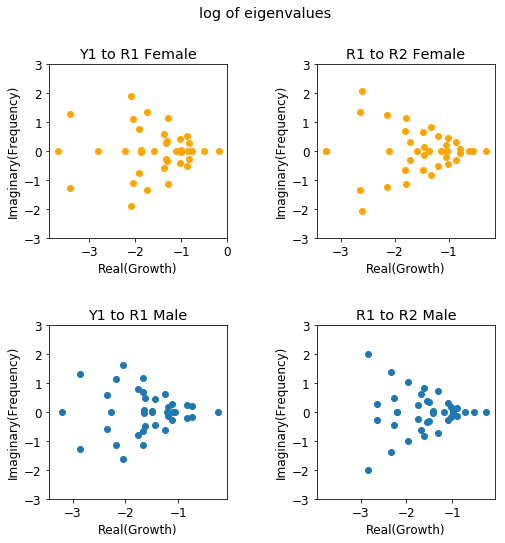

In [52]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8

# Y1 to R1 Female 
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.scatter(eiglog_Y1_F.real,eiglog_Y1_F.imag, color = 'orange')
ax0.set_ylim([-3,3])
ax0.set_xlabel('Real(Growth)')
ax0.set_ylabel('Imaginary(Frequency)')

# R1 to R2 Female 
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.scatter(eiglog_R1_F.real,eiglog_R1_F.imag, color = 'orange')
ax1.set_ylim([-3,3])
ax1.set_xlabel('Real(Growth)')
ax1.set_ylabel('Imaginary(Frequency)')

# Y1 to R1 Male
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.scatter(eiglog_Y1_M.real,eiglog_Y1_M.imag)
ax2.set_ylim([-3,3])
ax2.set_xlabel('Real(Growth)')
ax2.set_ylabel('Imaginary(Frequency)')

# R1 to R2 Male
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.scatter(eiglog_R1_M.real,eiglog_R1_M.imag)
ax3.set_ylim([-3,3])
ax3.set_xlabel('Real(Growth)')
ax3.set_ylabel('Imaginary(Frequency)')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('log of eigenvalues')

plt.show()

### PLOTs between growth and lamda * phi

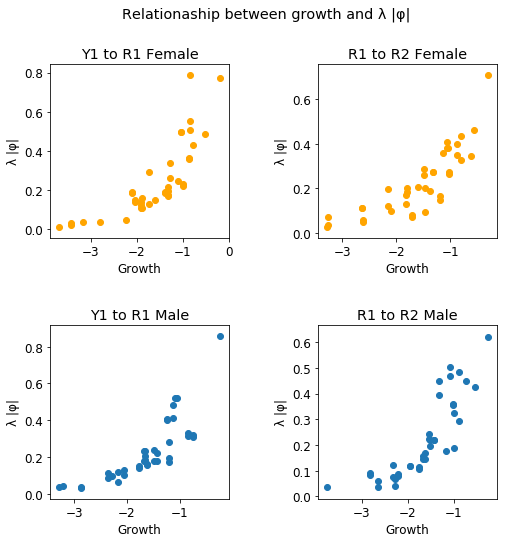

In [53]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8

# Y1 to R1 Female 
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.scatter(eiglog_Y1_F.real,lamphi_Y1_F, color = 'orange')
ax0.set_xlabel('Growth')
ax0.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Female 
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.scatter(eiglog_R1_F.real,lamphi_R1_F, color = 'orange')
ax1.set_xlabel('Growth')
ax1.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# Y1 to R1 Male 
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.scatter(eiglog_Y1_M.real,lamphi_Y1_M)
ax2.set_xlabel('Growth')
ax2.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Male 
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.scatter(eiglog_R1_M.real,lamphi_R1_M)
ax3.set_xlabel('Growth')
ax3.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('Relationaship between growth and 'u'\u03BB' ' |' u'\u03C6''|')

plt.show()

### PLOTs between frequency and lamda * phi

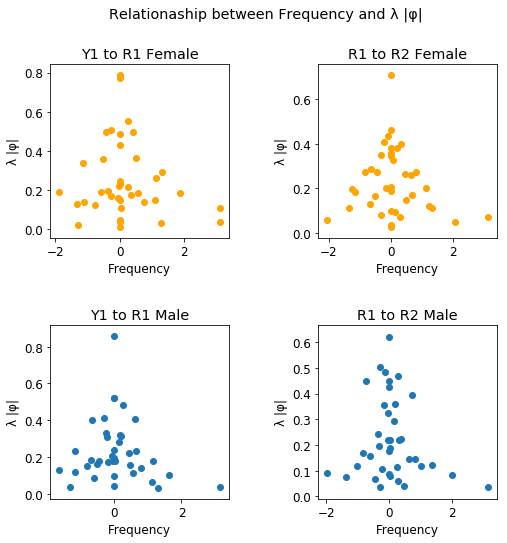

In [54]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8

# Y1 to R1 Female 
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.scatter(eiglog_Y1_F.imag,lamphi_Y1_F, color = 'orange')
ax0.set_xlabel('Frequency')
ax0.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Female 
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.scatter(eiglog_R1_F.imag,lamphi_R1_F, color = 'orange')
ax1.set_xlabel('Frequency')
ax1.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# Y1 to R1 Male 
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.scatter(eiglog_Y1_M.imag,lamphi_Y1_M)
ax2.set_xlabel('Frequency')
ax2.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

# R1 to R2 Male 
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.scatter(eiglog_R1_M.imag,lamphi_R1_M)
ax3.set_xlabel('Frequency')
ax3.set_ylabel(u'\u03BB' ' |' u'\u03C6''|')

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('Relationaship between Frequency and 'u'\u03BB' ' |' u'\u03C6''|')

plt.show()

### PLOTs for dominant eigen vectors

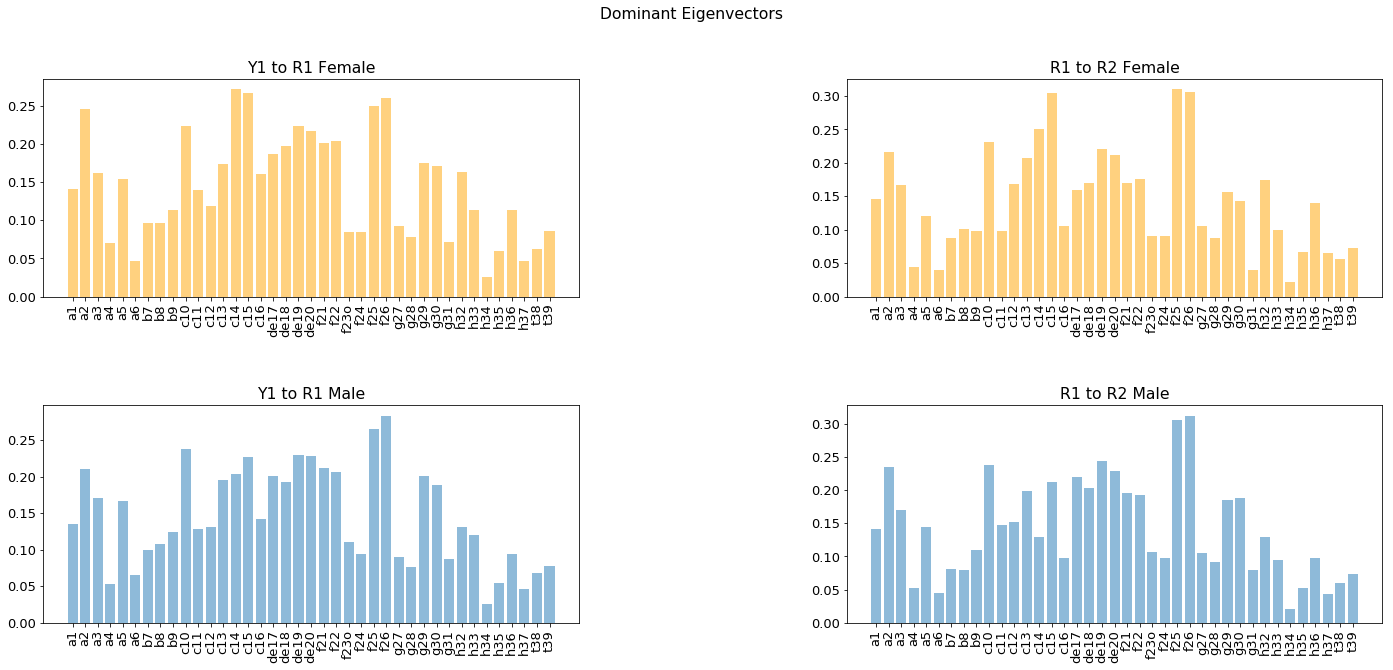

In [55]:
font = {'family' : 'DejaVu Sans',
  'size' : 13}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 10

# Y1 to R1 Female
index=np.zeros(39)
weiabs_Y1F=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_Y1F[j]=vectors_Y1_F[j,0].real
ax0 = plt.subplot(221)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Y1 to R1 Female")
ax0.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax0.set_xticklabels(label, rotation = 'vertical')
ax0.bar(index,abs(weiabs_Y1F),alpha=0.5, color = 'Orange')

# R1 to R2 Female
index=np.zeros(39)
weiabs_R1F=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_R1F[j]=vectors_R1_F[j,0].real
ax1 = plt.subplot(222)
ax1.get_xaxis().set_label_position('bottom')
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("R1 to R2 Female")
ax1.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax1.set_xticklabels(label, rotation = 'vertical')
ax1.bar(index,abs(weiabs_R1F),alpha=0.5, color = 'Orange')

# Y1 to R1 Male
index=np.zeros(39)
weiabs_Y1M=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_Y1M[j]=vectors_Y1_M[j,0].real
ax2 = plt.subplot(223)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Y1 to R1 Male")
ax2.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax2.set_xticklabels(label, rotation = 'vertical')
ax2.bar(index,abs(weiabs_Y1M),alpha=0.5)

# R1 to R2 Male
index=np.zeros(39)
weiabs_R1M=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs_R1M[j]=vectors_R1_M[j,0].real
ax3 = plt.subplot(224)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("R1 to R2 Male")
ax3.set_xticks(np.arange(min(index), max(index)+1, 1.0))
ax3.set_xticklabels(label, rotation = 'vertical')
ax3.bar(index,abs(weiabs_R1M),alpha=0.5)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.suptitle('Dominant Eigenvectors')

plt.show()

In [56]:
# export the dominant eigenvectors to the matrices

df1 = pd.DataFrame (weiabs_Y1F)
df1.to_csv('Y1_R1_F_eigenvector.csv')
df2 = pd.DataFrame (weiabs_Y1M)
df2.to_csv('Y1_R1_M_eigenvector.csv')
df3 = pd.DataFrame (weiabs_R1F)
df3.to_csv('R1_R2_F_eigenvector.csv')
df4 = pd.DataFrame (weiabs_R1M)
df4.to_csv('R1_R2_M_eigenvector.csv')

### Plots for comparison between dominant eigenvectors

<BarContainer object of 39 artists>

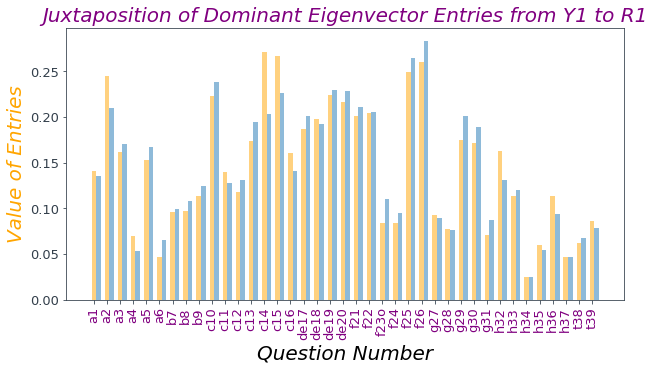

In [57]:
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries from Y1 to R1', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_Y1F),bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,abs(weiabs_Y1M),bar_width,alpha=0.5)

<BarContainer object of 39 artists>

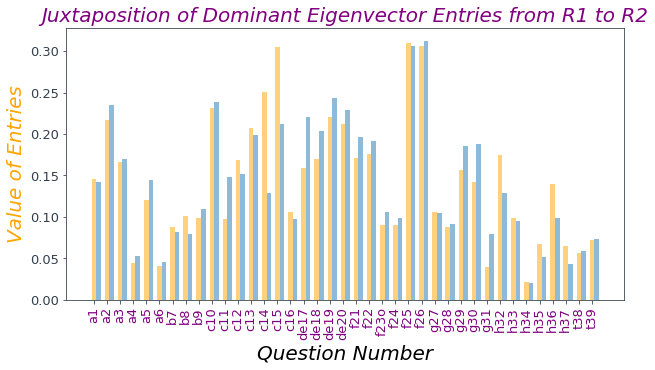

In [58]:
Gender = ['Female','Male']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries from R1 to R2', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_R1F),bar_width,alpha=0.5,color='orange')
plt.bar(pos+bar_width,abs(weiabs_R1M),bar_width,alpha=0.5)

<BarContainer object of 39 artists>

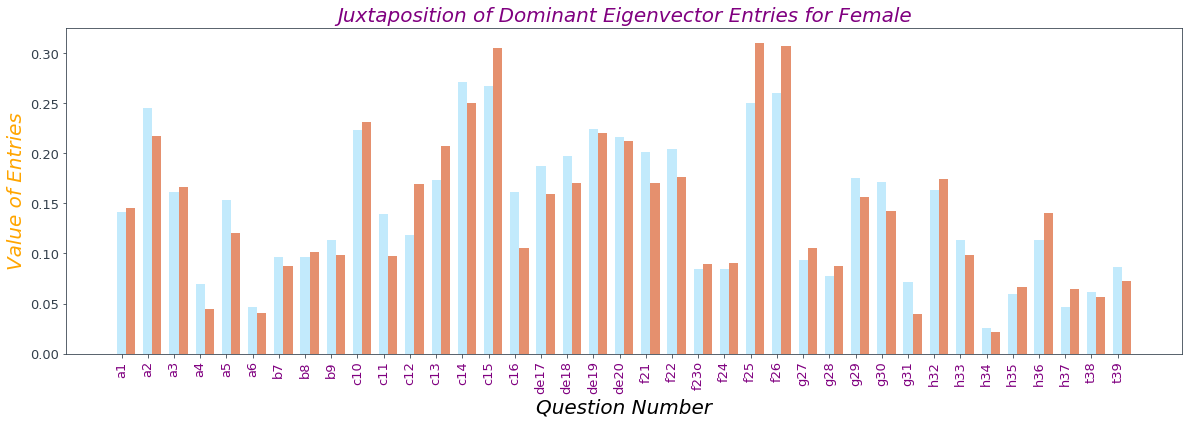

In [59]:
Year = ['Y1 to R1','R1 to R2']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries for Female', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_Y1F),bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,abs(weiabs_R1F),bar_width,color = '#df744a', alpha=0.8)

<BarContainer object of 39 artists>

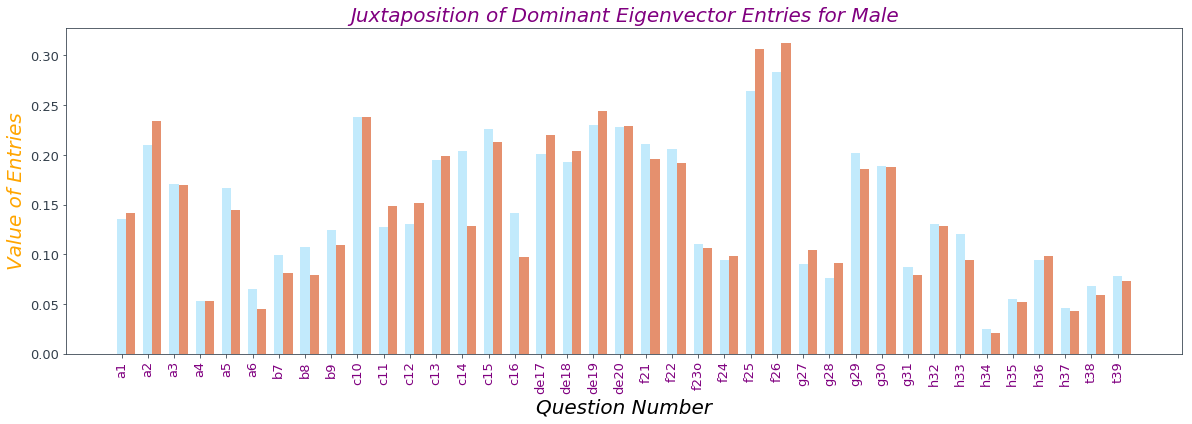

In [60]:
Year = ['Y1 to R1','R1 to R2']
pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(20,6))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries for Male', fontsize=20, fontweight=0, color='purple', loc='center', style='italic' ) 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='purple',rotation='vertical')
plt.xlabel('Question Number',fontsize=20, style='italic' )
plt.ylabel('Value of Entries',fontsize=20, color='orange', style='italic' )
plt.bar(pos,abs(weiabs_Y1M),bar_width,alpha=0.8,color='#b3e5fc')
plt.bar(pos+bar_width,abs(weiabs_R1M),bar_width,color = '#df744a', alpha=0.8)